Weather Information
-------------------
Enter latitude: 20
Enter longitude: 30

Current weather condition: Clear sky
{'time': '2023-12-03T00:45', 'interval': 900, 'temperature': 18.5, 'windspeed': 19.5, 'winddirection': 355, 'is_day': 0, 'weathercode': 0}
Renewable emissions: 4.3 metric tons of CO2
Non-renewable emissions: 84.14999999999999 metric tons of CO2
Renewable Sensor Type: Solar
Non-Renewable Sensor Type: Coal
Potential CO2 Emission Reduction: 72.9 metric tons
Excess energy stored: 77 units
Total energy supplied: 254 units
Remaining battery storage: 77 units
Year: 2023, Predicted CO2 Emission Saving: 72.90 metric tons
Year: 2024, Predicted CO2 Emission Saving: 73.03 metric tons
Year: 2025, Predicted CO2 Emission Saving: 73.17 metric tons
Year: 2026, Predicted CO2 Emission Saving: 73.30 metric tons
Year: 2027, Predicted CO2 Emission Saving: 73.43 metric tons
Year: 2028, Predicted CO2 Emission Saving: 73.57 metric tons
Year: 2029, Predicted CO2 Emission Saving: 73.70 metric tons

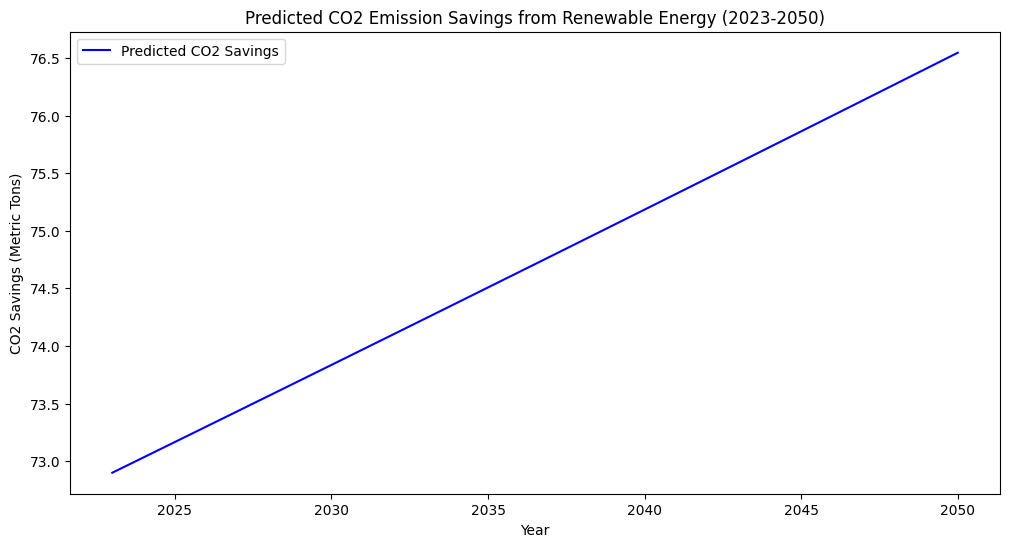

In [8]:
import random
import requests
import sys
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Carbon emission factors for different energy sources (in metric tons of CO2 per TWh)
CARBON_EMISSION_FACTORS = {
    'Solar': 0.05,
    'Wind': 0.04,
    'Hydro': 0.1,
    'Other': 0.25,
    'Coal': 0.85
}

# Weather codes mappings
weather_conditions = {
    0: "Clear sky",
    1: "Mainly clear, partly cloudy, and overcast",
    2: "Low-level clouds",
    3: "Mid-level clouds",
    45: "Fog and depositing rime fog",
    48: "Depositing rime fog",
    51: "Light drizzle",
    53: "Moderate drizzle",
    55: "Dense drizzle",
    56: "Light freezing drizzle",
    57: "Dense freezing drizzle",
    61: "Slight rain",
    63: "Moderate rain",
    65: "Heavy rain",
    66: "Light freezing rain",
    67: "Heavy freezing rain",
    71: "Slight snow fall",
    73: "Moderate snow fall",
    75: "Heavy snow fall",
    77: "Snow grains",
    80: "Slight rain showers",
    81: "Moderate rain showers",
    82: "Violent rain showers",
    85: "Slight snow showers",
    86: "Heavy snow showers",
    95: "Thunderstorm",
    96: "Thunderstorm with slight hail",
    99: "Thunderstorm with heavy hail",
}

# API link
api_url = "https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"

# Sensor classes
class Sensor:
    def __init__(self, sensor_type):
        self.sensor_type = sensor_type

    def get_real_time_data(self):
        return random.randint(80, 120)  # Simulated energy value

# Renewable sensors
class SolarSensor(Sensor):
    def get_adapted_data(self, weather_condition):
        if weather_condition == 'sunny':
            return self.get_real_time_data() * 1.5
        return self.get_real_time_data()

class WindSensor(Sensor):
    def get_adapted_data(self, weather_condition):
        if weather_condition == 'windy':
            return self.get_real_time_data() * 1.3
        return self.get_real_time_data()

class HydroSensor(Sensor):
    def get_adapted_data(self, weather_condition):
        if weather_condition in ['rainy', 'stormy']:
            return self.get_real_time_data() * 1.2
        return self.get_real_time_data()

class OtherSensor(Sensor):
    def get_adapted_data(self, weather_condition):
        return self.get_real_time_data()  # Constant output irrespective of weather

# Non-Renewable Sensor Class
class NonRenewableSensor(Sensor):
    def get_adapted_data(self, weather_condition):
        return self.get_real_time_data()

# Energy Management System
class EnergyManagementSystem:
    def __init__(self):
        self.renewable_sensor = None
        self.non_renewable_sensor = None

    def set_sensors(self, renewable_sensor, non_renewable_sensor):
        self.renewable_sensor = renewable_sensor
        self.non_renewable_sensor = non_renewable_sensor

    def analyze_energy_data(self, weather_condition):
        renewable_energy = self.renewable_sensor.get_adapted_data(weather_condition) if self.renewable_sensor else 0
        non_renewable_energy = self.non_renewable_sensor.get_adapted_data(weather_condition) if self.non_renewable_sensor else 0
        self.calculate_emission_savings(renewable_energy, non_renewable_energy)

        # Print the sensor types being used
        if self.renewable_sensor:
            print(f"Renewable Sensor Type: {self.renewable_sensor.sensor_type}")
        if self.non_renewable_sensor:
            print(f"Non-Renewable Sensor Type: {self.non_renewable_sensor.sensor_type}")

    def calculate_emission_savings(self, renewable_energy, non_renewable_energy):
        renewable_emission_factor = CARBON_EMISSION_FACTORS.get(self.renewable_sensor.sensor_type.split()[0], 1)
        non_renewable_emission_factor = CARBON_EMISSION_FACTORS.get(self.non_renewable_sensor.sensor_type.split()[0], 1)
        renewable_emissions = renewable_energy * renewable_emission_factor
        non_renewable_emissions = non_renewable_energy * non_renewable_emission_factor

        print(f"Renewable emissions: {renewable_emissions} metric tons of CO2")
        print(f"Non-renewable emissions: {non_renewable_emissions} metric tons of CO2")

    def calculate_total_energy(self, weather_condition):
        # Calculate total energy generated by both renewable and non-renewable sensors
        renewable_energy = self.renewable_sensor.get_adapted_data(weather_condition) if self.renewable_sensor else 0
        non_renewable_energy = self.non_renewable_sensor.get_adapted_data(weather_condition) if self.non_renewable_sensor else 0
        return renewable_energy + non_renewable_energy

    def compare_emissions(self, renewable_energy, non_renewable_energy):
        # Calculate emissions from renewable and non-renewable sources
        renewable_emission_factor = CARBON_EMISSION_FACTORS.get(self.renewable_sensor.sensor_type.split()[0], 1)
        non_renewable_emission_factor = CARBON_EMISSION_FACTORS.get(self.non_renewable_sensor.sensor_type.split()[0], 1)

        renewable_emissions = renewable_energy * renewable_emission_factor
        non_renewable_emissions = non_renewable_energy * non_renewable_emission_factor

        # Calculate potential emission reduction
        emission_reduction = non_renewable_emissions - renewable_emissions

        print(f"Potential CO2 Emission Reduction: {emission_reduction} metric tons")

        return emission_reduction

class BatteryStorage:
    def __init__(self, capacity):
        self.capacity = capacity  # Maximum storage capacity in units
        self.stored_energy = 0    # Current stored energy

    def store_energy(self, energy):
        # Store energy in the battery, respecting its capacity
        self.stored_energy = min(self.stored_energy + energy, self.capacity)

    def release_energy(self, energy_needed):
        # Release energy from the battery, respecting its current storage
        energy_released = min(self.stored_energy, energy_needed)
        self.stored_energy -= energy_released
        return energy_released

class SmartGridController:
    def __init__(self, energy_system, battery_storage):
        self.energy_system = energy_system
        self.battery_storage = battery_storage

    def manage_energy_flow(self, demand, weather_condition):
        generated_energy = self.energy_system.calculate_total_energy(weather_condition)
        energy_deficit = demand - generated_energy
        energy_from_battery = 0

        if energy_deficit > 0:
            energy_from_battery = self.battery_storage.release_energy(energy_deficit)
            print(f"Energy released from battery: {energy_from_battery} units")
        else:
            excess_energy = -energy_deficit
            self.battery_storage.store_energy(excess_energy)
            print(f"Excess energy stored: {excess_energy} units")

        # Update smart grid status
        print(f"Total energy supplied: {generated_energy - energy_deficit + energy_from_battery} units")
        print(f"Remaining battery storage: {self.battery_storage.stored_energy} units")

class FutureEmissionPredictor:
    def __init__(self, current_year, final_year, current_emission_reduction):
        self.current_year = current_year
        self.final_year = final_year
        self.current_emission_reduction = current_emission_reduction

    def predict_future_savings(self, degree=3):
        years = np.array([self.current_year, self.final_year]).reshape(-1, 1)
        savings = np.array([self.current_emission_reduction, self.current_emission_reduction * 1.05])
        polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        polynomial_model.fit(years, savings)
        future_years = np.arange(self.current_year, self.final_year + 1).reshape(-1, 1)
        return future_years.flatten(), polynomial_model.predict(future_years)

# Function to get weather data
def get_weather_data(latitude, longitude):

    final_url = api_url.format(lat=latitude, lon=longitude)

    try:
        response = requests.get(final_url)
        response.raise_for_status()

        data = response.json()

        weather_code = data['current_weather']['weathercode']
        weather_condition = weather_conditions[weather_code]
        print(f"Current weather condition: {weather_condition}")

        return data['current_weather']

    except requests.exceptions.HTTPError as err:
        print(f"Error getting weather data: {err}")
        sys.exit(1)

# Main execution
def main():
    print("Weather Information")
    print("-------------------")

    latitude = float(input("Enter latitude: "))
    longitude = float(input("Enter longitude: "))

    print()

    weather_data = get_weather_data(latitude, longitude)
    print(weather_data)

    energy_system = EnergyManagementSystem()

    # Choose and set the appropriate sensor
    weather_code = weather_data['weathercode']
    weather = weather_conditions[weather_code]

    if weather in ["Clear sky", "Mainly clear, partly cloudy"]:
        energy_system.set_sensors(SolarSensor("Solar"), NonRenewableSensor("Coal"))
    elif weather == "Windy":
        energy_system.set_sensors(WindSensor("Wind"), NonRenewableSensor("Coal"))
    elif weather in ["Rainy", "Stormy"]:
        energy_system.set_sensors(HydroSensor("Hydro"), NonRenewableSensor("Coal"))
    else:
        energy_system.set_sensors(OtherSensor("Other"), NonRenewableSensor("Coal"))

    # Simulate real-time energy data analysis and emission comparison
    energy_system.analyze_energy_data(weather_conditions)
    emission_reduction = energy_system.compare_emissions(
        energy_system.renewable_sensor.get_adapted_data(weather_conditions),
        energy_system.non_renewable_sensor.get_adapted_data(weather_conditions)
    )

    battery_capacity = 500  # Example capacity
    battery_storage = BatteryStorage(battery_capacity)
    energy_system = EnergyManagementSystem()
    smart_grid_controller = SmartGridController(energy_system, battery_storage)

    # Set sensors as before and provided weather condition
    energy_system.set_sensors(SolarSensor("Solar"), NonRenewableSensor("Coal"))
    energy_demand = 100  # Example demand
    smart_grid_controller.manage_energy_flow(energy_demand, weather_conditions)

    # Future Emission Prediction and Visualization
    current_year = 2023
    final_year = 2050
    current_emission_reduction = emission_reduction  # From the previous part of the code
    predictor = FutureEmissionPredictor(current_year, final_year, current_emission_reduction)
    future_years, predicted_savings = predictor.predict_future_savings()

    # Display the predicted CO2 emission savings
    for year, saving in zip(future_years, predicted_savings):
        print(f"Year: {year}, Predicted CO2 Emission Saving: {saving:.2f} metric tons")

    # Visualization of the predicted savings
    plt.figure(figsize=(12, 6))
    plt.plot(future_years, predicted_savings, 'b-', label='Predicted CO2 Savings')
    plt.title('Predicted CO2 Emission Savings from Renewable Energy (2023-2050)')
    plt.xlabel('Year')
    plt.ylabel('CO2 Savings (Metric Tons)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
